In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 1000)

# Data Exploration

In [3]:
# read data
rea = pd.read_csv("Data/real_estate_2020_2024.csv")

In [4]:
list(rea.columns)

['parcel_number',
 'year',
 'exterior_condition',
 'interior_condition',
 'homestead_exemption',
 'number_of_bathrooms',
 'number_of_bedrooms',
 'number_stories',
 'year_built',
 'sale_year',
 'condo',
 'apartments',
 'commercial',
 'garage',
 'hotel',
 'industrial',
 'mixed_use',
 'multi_family',
 'offices',
 'retail',
 'single_family',
 'special_purpose',
 'vacant_land',
 'mailing_outside_city',
 'chg_taxable_1yr',
 'chg_taxable_1yr_%',
 'chg_taxable_3yr',
 'chg_taxable_3yr_%',
 'chg_taxable_5yr',
 'chg_taxable_5yr_%',
 'taxable_%',
 'delinq',
 'delinq_1yr',
 'delinq_2yr',
 'delinq_3yr',
 'delinq_4yr',
 'delinq_5yr',
 'years_delinq',
 'years_since_last_delinq',
 'max_conseq_years_delinq',
 'sale_price_log',
 'total_area_log',
 'total_livable_area_log',
 'market_value_log',
 'taxable_land_log',
 'taxable_building_log',
 'exempt_land_log',
 'exempt_building_log',
 'taxable_log',
 'exempt_log',
 'taxable_1yr_log',
 'exempt_1yr_log',
 'taxable_3yr_log',
 'exempt_3yr_log',
 'taxable_5yr_l

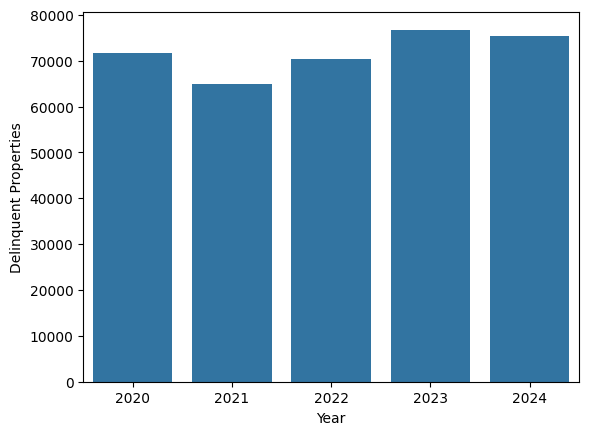

In [5]:
# create df with delinquency counts by year
df = rea.groupby('year')['delinq'].sum().reset_index()

# create bar plot                     
sns.barplot(df, x ="year", y="delinq")
plt.ylabel("Delinquent Properties")
plt.xlabel("Year")

# display plot
plt.show()

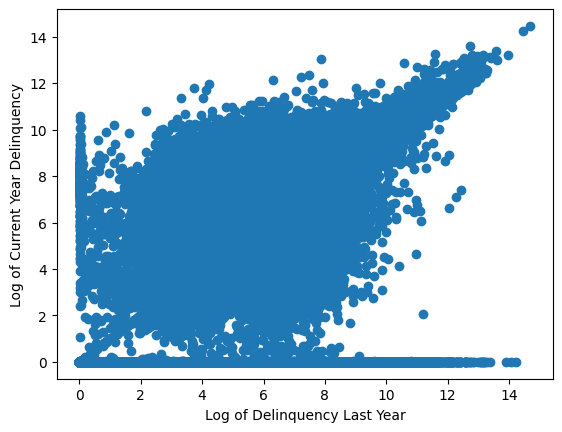

In [6]:
# create scatter plot of delinquency amount last year by delinquency amount this year
plt.scatter(rea.delinq_bal_log, rea.delinq_bal_1yr_log)
plt.xlabel('Log of Delinquency Last Year')
plt.ylabel('Log of Current Year Delinquency')
plt.show()

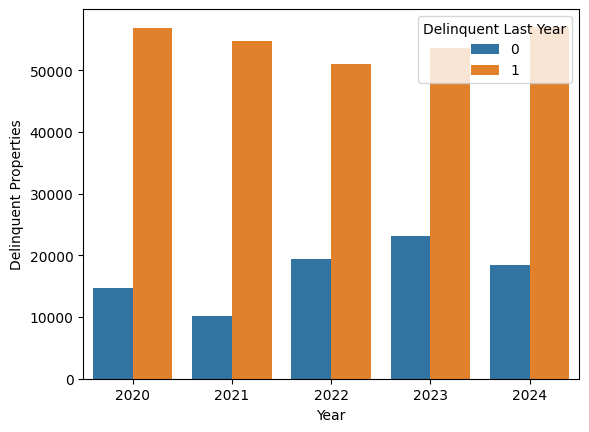

In [7]:
# create df with delinquency counts by year and whether they were delinquent last year
df = rea.groupby(['year','delinq_1yr'])['delinq'].sum().reset_index()

# create bar plot                     
sns.barplot(df, x ="year", y="delinq", hue='delinq_1yr')
plt.ylabel("Delinquent Properties")
plt.xlabel("Year")
plt.legend(title="Delinquent Last Year")

# display plot
plt.show()

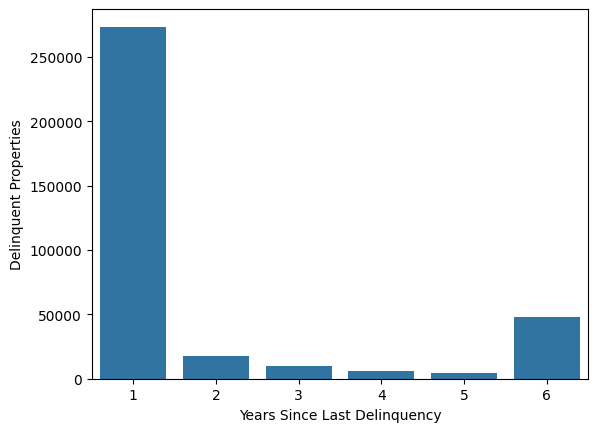

In [8]:
# create df with delinquency counts by years since last delinquenct
df = rea.groupby(['years_since_last_delinq'])['delinq'].sum().reset_index()

# create bar plot                     
sns.barplot(df, x ="years_since_last_delinq", y="delinq")
plt.ylabel("Delinquent Properties")
plt.xlabel("Years Since Last Delinquency")


# display plot
plt.show()

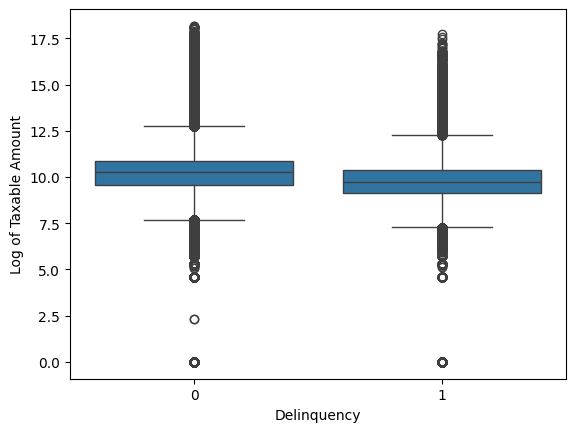

In [9]:
# create violin plot of taxable amount by delinquency
sns.boxplot(x='delinq',y='taxable_land_log', data=rea)
plt.xlabel('Delinquency')
plt.ylabel('Log of Taxable Amount')
plt.show()


In [10]:
# create correlation matrix
corr_matrix = rea[['exterior_condition',
 'interior_condition',
 'homestead_exemption',
 'number_of_bathrooms',
 'number_of_bedrooms',
 'number_stories',
 'year_built',
 'sale_year',
 'chg_taxable_1yr',
 'chg_taxable_3yr',
 'chg_taxable_5yr',
 'taxable_%',
 'delinq',
 'delinq_1yr',
 'delinq_2yr',
 'delinq_3yr',
 'delinq_4yr',
 'delinq_5yr',
 'years_delinq',
 'years_since_last_delinq',
 'max_conseq_years_delinq',
 'sale_price_log',
 'total_area_log',
 'total_livable_area_log',
 'market_value_log',
 'taxable_land_log',
 'taxable_building_log',
 'exempt_land_log',
 'exempt_building_log',
 'taxable_log',
 'exempt_log',
 'taxable_1yr_log',
 'exempt_1yr_log',
 'taxable_3yr_log',
 'exempt_3yr_log',
 'taxable_5yr_log',
 'exempt_5yr_log',
 'delinq_bal_log',
 'delinq_bal_1yr_log',
 'delinq_bal_2yr_log',
 'delinq_bal_3yr_log',
 'delinq_bal_4yr_log',
 'delinq_bal_5yr_log',
 'del_assessed_ratio_1yr_log']
 ].corr()

<Axes: >

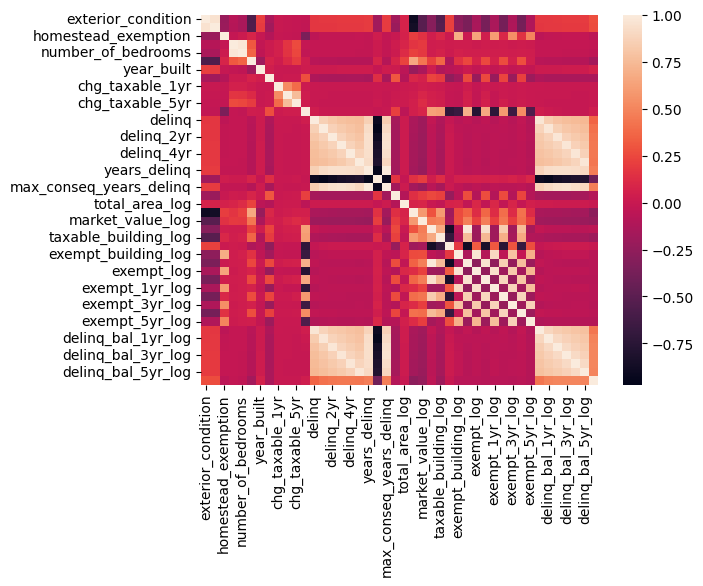

In [11]:
# create correlation heat map
sns.heatmap(corr_matrix)